# Modelos de clasificación

**Autor/es:**
+ Cristobal Betancurt Palma
+ Jonathan Olivares Garces

**Correos Electrónicos:**
+ Cristobal.betancurt2101@alumnos.ubiobio.cl
+ Jonathan.olivares2101@alumnos.ubiobio.cl

**Fecha de Creación:** Octubre de 2024  
**Versión:** 1.0

---

## Descripción

Este notebook contiene el desarrollo de la evaluación 2 - parte 1 de la asignatura de Inteligencia Artificial de la carrera de Ingeniería civil en informática de la Universidad del Bío Bío - Sede Concepción

# Carga de datos

In [1]:
# Descargar el archivo
!wget https://raw.githubusercontent.com/JaznaLaProfe/InteligenciaArtificial/main/data/empleados.csv.zip

# Descomprimir el archivo
!unzip -q empleados.csv.zip

# Eliminar el archivo zip
!rm empleados.csv.zip

# Eliminar la carpeta __MACOSX si se creó
!rm -rf __MACOSX

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"unzip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"rm" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


## IMPORTACIONES

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, mean_squared_error
from sklearn.tree import plot_tree


import warnings
warnings.filterwarnings('ignore')

# Carga de data

In [3]:
data = pd.read_csv('empleados.csv')
data.shape

(74498, 24)

# Metodología CRISP-DM

## Fase 2 - Comprensión de los datos

In [4]:
# Nombre de las columnas
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [5]:
# Obtiene las primeras 5 observaciones
data.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [6]:
# Obtiene detalles de las columnas 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Employee ID               74498 non-null  int64 
 1   Age                       74498 non-null  int64 
 2   Gender                    74498 non-null  object
 3   Years at Company          74498 non-null  int64 
 4   Job Role                  74498 non-null  object
 5   Monthly Income            74498 non-null  int64 
 6   Work-Life Balance         74498 non-null  object
 7   Job Satisfaction          74498 non-null  object
 8   Performance Rating        74498 non-null  object
 9   Number of Promotions      74498 non-null  int64 
 10  Overtime                  74498 non-null  object
 11  Distance from Home        74498 non-null  int64 
 12  Education Level           74498 non-null  object
 13  Marital Status            74498 non-null  object
 14  Number of Dependents  

In [7]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['int64']).nunique()


Employee ID             74498
Age                        42
Years at Company           51
Monthly Income           9842
Number of Promotions        5
Distance from Home         99
Number of Dependents        7
Company Tenure            127
dtype: int64

In [8]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['object']).nunique()


Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

---
$\textbf{COMENTARIO}$

----
Tenemos 8 variables cuantitativas y 16 cualitativas

In [9]:
# Obtiene la cantidad de regostros con valores nulos
data.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           0
Job Satisfaction            0
Performance Rating          0
Number of Promotions        0
Overtime                    0
Distance from Home          0
Education Level             0
Marital Status              0
Number of Dependents        0
Job Level                   0
Company Size                0
Company Tenure              0
Remote Work                 0
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        0
Attrition                   0
dtype: int64

In [10]:
# Usaremos un método resumen de estadísticas numéricas
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37249.500000,21505.864514,1.0,18625.25,37249.5,55873.75,74498.0
Age,74498.0,38.529746,12.083456,18.0,28.00,39.0,49.00,59.0
Years at Company,74498.0,15.721603,11.223744,1.0,7.00,13.0,23.00,51.0
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.00,7348.0,8876.00,16149.0
Number of Promotions,74498.0,0.832935,0.995289,0.0,0.00,1.0,2.00,4.0
Distance from Home,74498.0,49.991584,28.513611,1.0,25.00,50.0,75.00,99.0
Number of Dependents,74498.0,1.650326,1.553633,0.0,0.00,1.0,3.00,6.0
Company Tenure,74498.0,55.727456,25.399349,2.0,36.00,56.0,76.00,128.0


In [11]:
data.columns

Index(['Employee ID', 'Age', 'Gender', 'Years at Company', 'Job Role',
       'Monthly Income', 'Work-Life Balance', 'Job Satisfaction',
       'Performance Rating', 'Number of Promotions', 'Overtime',
       'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Leadership Opportunities', 'Innovation Opportunities',
       'Company Reputation', 'Employee Recognition', 'Attrition'],
      dtype='object')

In [12]:
# Se crea una copia del dataset
df = data

---
$\textbf{Tratamiento de Variables Categoricas}$

----

In [13]:
# Variables cualitiativas categoricas   
df.select_dtypes(include=['object']).nunique()


Gender                      2
Job Role                    5
Work-Life Balance           4
Job Satisfaction            4
Performance Rating          4
Overtime                    2
Education Level             5
Marital Status              3
Job Level                   3
Company Size                3
Remote Work                 2
Leadership Opportunities    2
Innovation Opportunities    2
Company Reputation          4
Employee Recognition        4
Attrition                   2
dtype: int64

In [14]:
df.groupby("Gender").size()

Gender
Female    33672
Male      40826
dtype: int64

In [15]:
df.Gender.replace({"Female":2, "Male":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,Education,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,Media,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,Healthcare,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,Education,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,Education,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [16]:
data.groupby("Job Role").size()

Job Role
Education     15658
Finance       10448
Healthcare    17074
Media         11996
Technology    19322
dtype: int64

In [17]:
df["Job Role"].replace({"Education": 5, "Finance": 4, "Healthcare": 3, "Media": 2, "Technology": 1}, inplace=True)
df.head()


,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,Excellent,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,Poor,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,Good,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,Good,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,Fair,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [18]:
data.groupby("Work-Life Balance").size()

Work-Life Balance
Excellent    13432
Fair         22529
Good         28158
Poor         10379
dtype: int64

In [19]:
df["Work-Life Balance"].replace({"Excellent":4, "Fair":3,"Good":2, "Poor":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,4,Medium,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,1,High,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,2,High,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,2,High,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,3,Very High,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [20]:
data.groupby("Job Satisfaction").size()

Job Satisfaction
High         37245
Low           7457
Medium       14717
Very High    15079
dtype: int64

In [21]:
df["Job Satisfaction"].replace({"High":4, "Low":3,"Medium":2,"Very High":1}, inplace=True)
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,1,19,5,5390,4,2,Average,2,...,0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,2,4,2,5534,1,4,Low,3,...,3,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,2,10,3,8159,2,4,Low,0,...,3,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,2,7,5,3989,2,4,High,1,...,2,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,1,41,5,4821,3,1,Average,0,...,0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


In [22]:
data.groupby("Performance Rating").size()

Performance Rating
Average          44719
Below Average    11139
High             14910
Low               3730
dtype: int64

In [23]:
df["Performance Rating"].replace({"Average":4, "Below Average":3,"High":2,"Low":1,}, inplace=True)
df.groupby("Performance Rating").size()

Performance Rating
1     3730
2    14910
3    11139
4    44719
dtype: int64

In [24]:
data.groupby("Overtime").size()

Overtime
No     50157
Yes    24341
dtype: int64

In [25]:
df["Overtime"].replace({"No":2,"Yes":1,}, inplace=True)
df.groupby("Overtime").size()

Overtime
1    24341
2    50157
dtype: int64

In [26]:
data.groupby("Education Level").size()

Education Level
Associate Degree     18649
Bachelor’s Degree    22331
High School          14680
Master’s Degree      15021
PhD                   3817
dtype: int64

In [27]:
df["Education Level"].replace({"Associate Degree":5,"Bachelor’s Degree":4, "High School":3,"Master’s Degree":2,"PhD":1,}, inplace=True)
df.groupby("Education Level").size()

Education Level
1     3817
2    15021
3    14680
4    22331
5    18649
dtype: int64

In [28]:
data.groupby("Marital Status").size()

Marital Status
Divorced    11078
Married     37419
Single      26001
dtype: int64

In [29]:
df["Marital Status"].replace({"Divorced":3,"Married":2,"Single":1}, inplace=True)
df.groupby("Marital Status").size()

Marital Status
1    26001
2    37419
3    11078
dtype: int64

In [30]:
data.groupby("Job Level").size()

Job Level
Entry     29780
Mid       29678
Senior    15040
dtype: int64

In [31]:
df["Job Level"].replace({"Entry":3,"Mid":2,"Senior":1}, inplace=True)
df.groupby("Job Level").size()

Job Level
1    15040
2    29678
3    29780
dtype: int64

In [32]:
data.groupby("Company Size").size()

Company Size
Large     14912
Medium    37231
Small     22355
dtype: int64

In [33]:
df["Company Size"].replace({"Large":3,"Medium":2,"Small":1}, inplace=True)
df.groupby("Company Size").size()

Company Size
1    22355
2    37231
3    14912
dtype: int64

In [34]:
data.groupby("Remote Work").size()

Remote Work
No     60300
Yes    14198
dtype: int64

In [35]:
df["Remote Work"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Remote Work").size()

Remote Work
1    14198
2    60300
dtype: int64

In [36]:
data.groupby("Leadership Opportunities").size()

Leadership Opportunities
No     70845
Yes     3653
dtype: int64

In [37]:
df["Leadership Opportunities"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Leadership Opportunities").size()

Leadership Opportunities
1     3653
2    70845
dtype: int64

In [38]:
data.groupby("Innovation Opportunities").size()

Innovation Opportunities
No     62394
Yes    12104
dtype: int64

In [39]:
df["Innovation Opportunities"].replace({"No":2,"Yes":1}, inplace=True)
df.groupby("Innovation Opportunities").size()

Innovation Opportunities
1    12104
2    62394
dtype: int64

In [40]:
data.groupby("Company Reputation").size()

Company Reputation
Excellent     7414
Fair         14786
Good         37182
Poor         15116
dtype: int64

In [41]:
df["Company Reputation"].replace({"Excellent":4,"Fair":3,"Good":2,"Poor":1}, inplace=True)
df.groupby("Company Reputation").size()

Company Reputation
1    15116
2    37182
3    14786
4     7414
dtype: int64

In [42]:
data.groupby("Employee Recognition").size()

Employee Recognition
High         18550
Low          29620
Medium       22657
Very High     3671
dtype: int64

In [43]:
df["Employee Recognition"].replace({"Very High":4,"High":3,"Low":2,"Medium":1}, inplace=True)
df.groupby("Employee Recognition").size()

Employee Recognition
1    22657
2    29620
3    18550
4     3671
dtype: int64

In [44]:
data.groupby("Attrition").size()

Attrition
Left      35370
Stayed    39128
dtype: int64

In [45]:
df["Attrition"].replace({"Left":2,"Stayed":1}, inplace=True)
df.groupby("Attrition").size()

Attrition
1    39128
2    35370
dtype: int64

In [46]:
# Variables cualitiativas categoricas   
data.select_dtypes(include=['int64']).nunique()


Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

---

$\textbf{COMENTARIO}$

----


Ya no quedan variables que no sean cuantitavias por lo que se podrian realizar los mapas de calor

---

$\textbf{Graficos}$

----

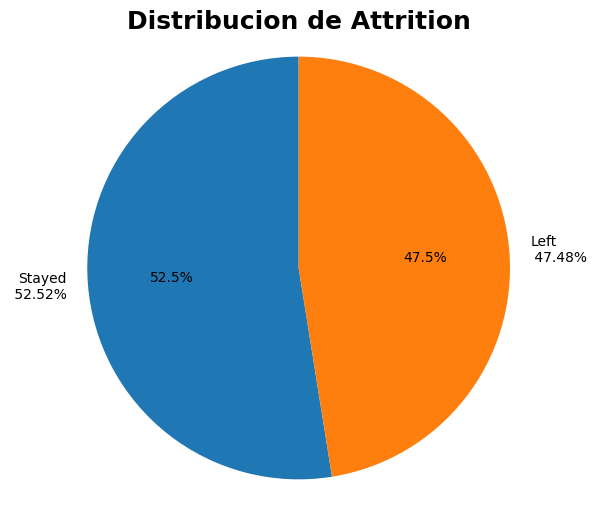

In [47]:

# Asegúrate de trabajar con los valores numéricos actualizados
clases = np.array([data[data.Attrition == 1].shape[0],  # Stayed
                   data[data.Attrition == 2].shape[0]]) # Left

# Validamos que no haya valores NaN o 0 en las clases
if np.any(np.isnan(clases)) or np.sum(clases) == 0:
    print("Error: Hay valores NaN o las clases están vacías.")
else:
    # Creando las leyendas del gráfico.
    labels = [str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
    labels[0] = 'Stayed\n ' + labels[0]
    labels[1] = 'Left\n ' + labels[1]

    # Crear el gráfico de torta
    plt.figure(figsize=(6, 6))
    plt.pie(clases, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('Distribucion de Attrition', fontsize=18, fontweight="bold")
    plt.axis('equal')  # Para que el gráfico de torta sea un círculo
    plt.show()


---
$\textbf{COMENTARIO}$

----
La distribucion es mas o menos simetrica 

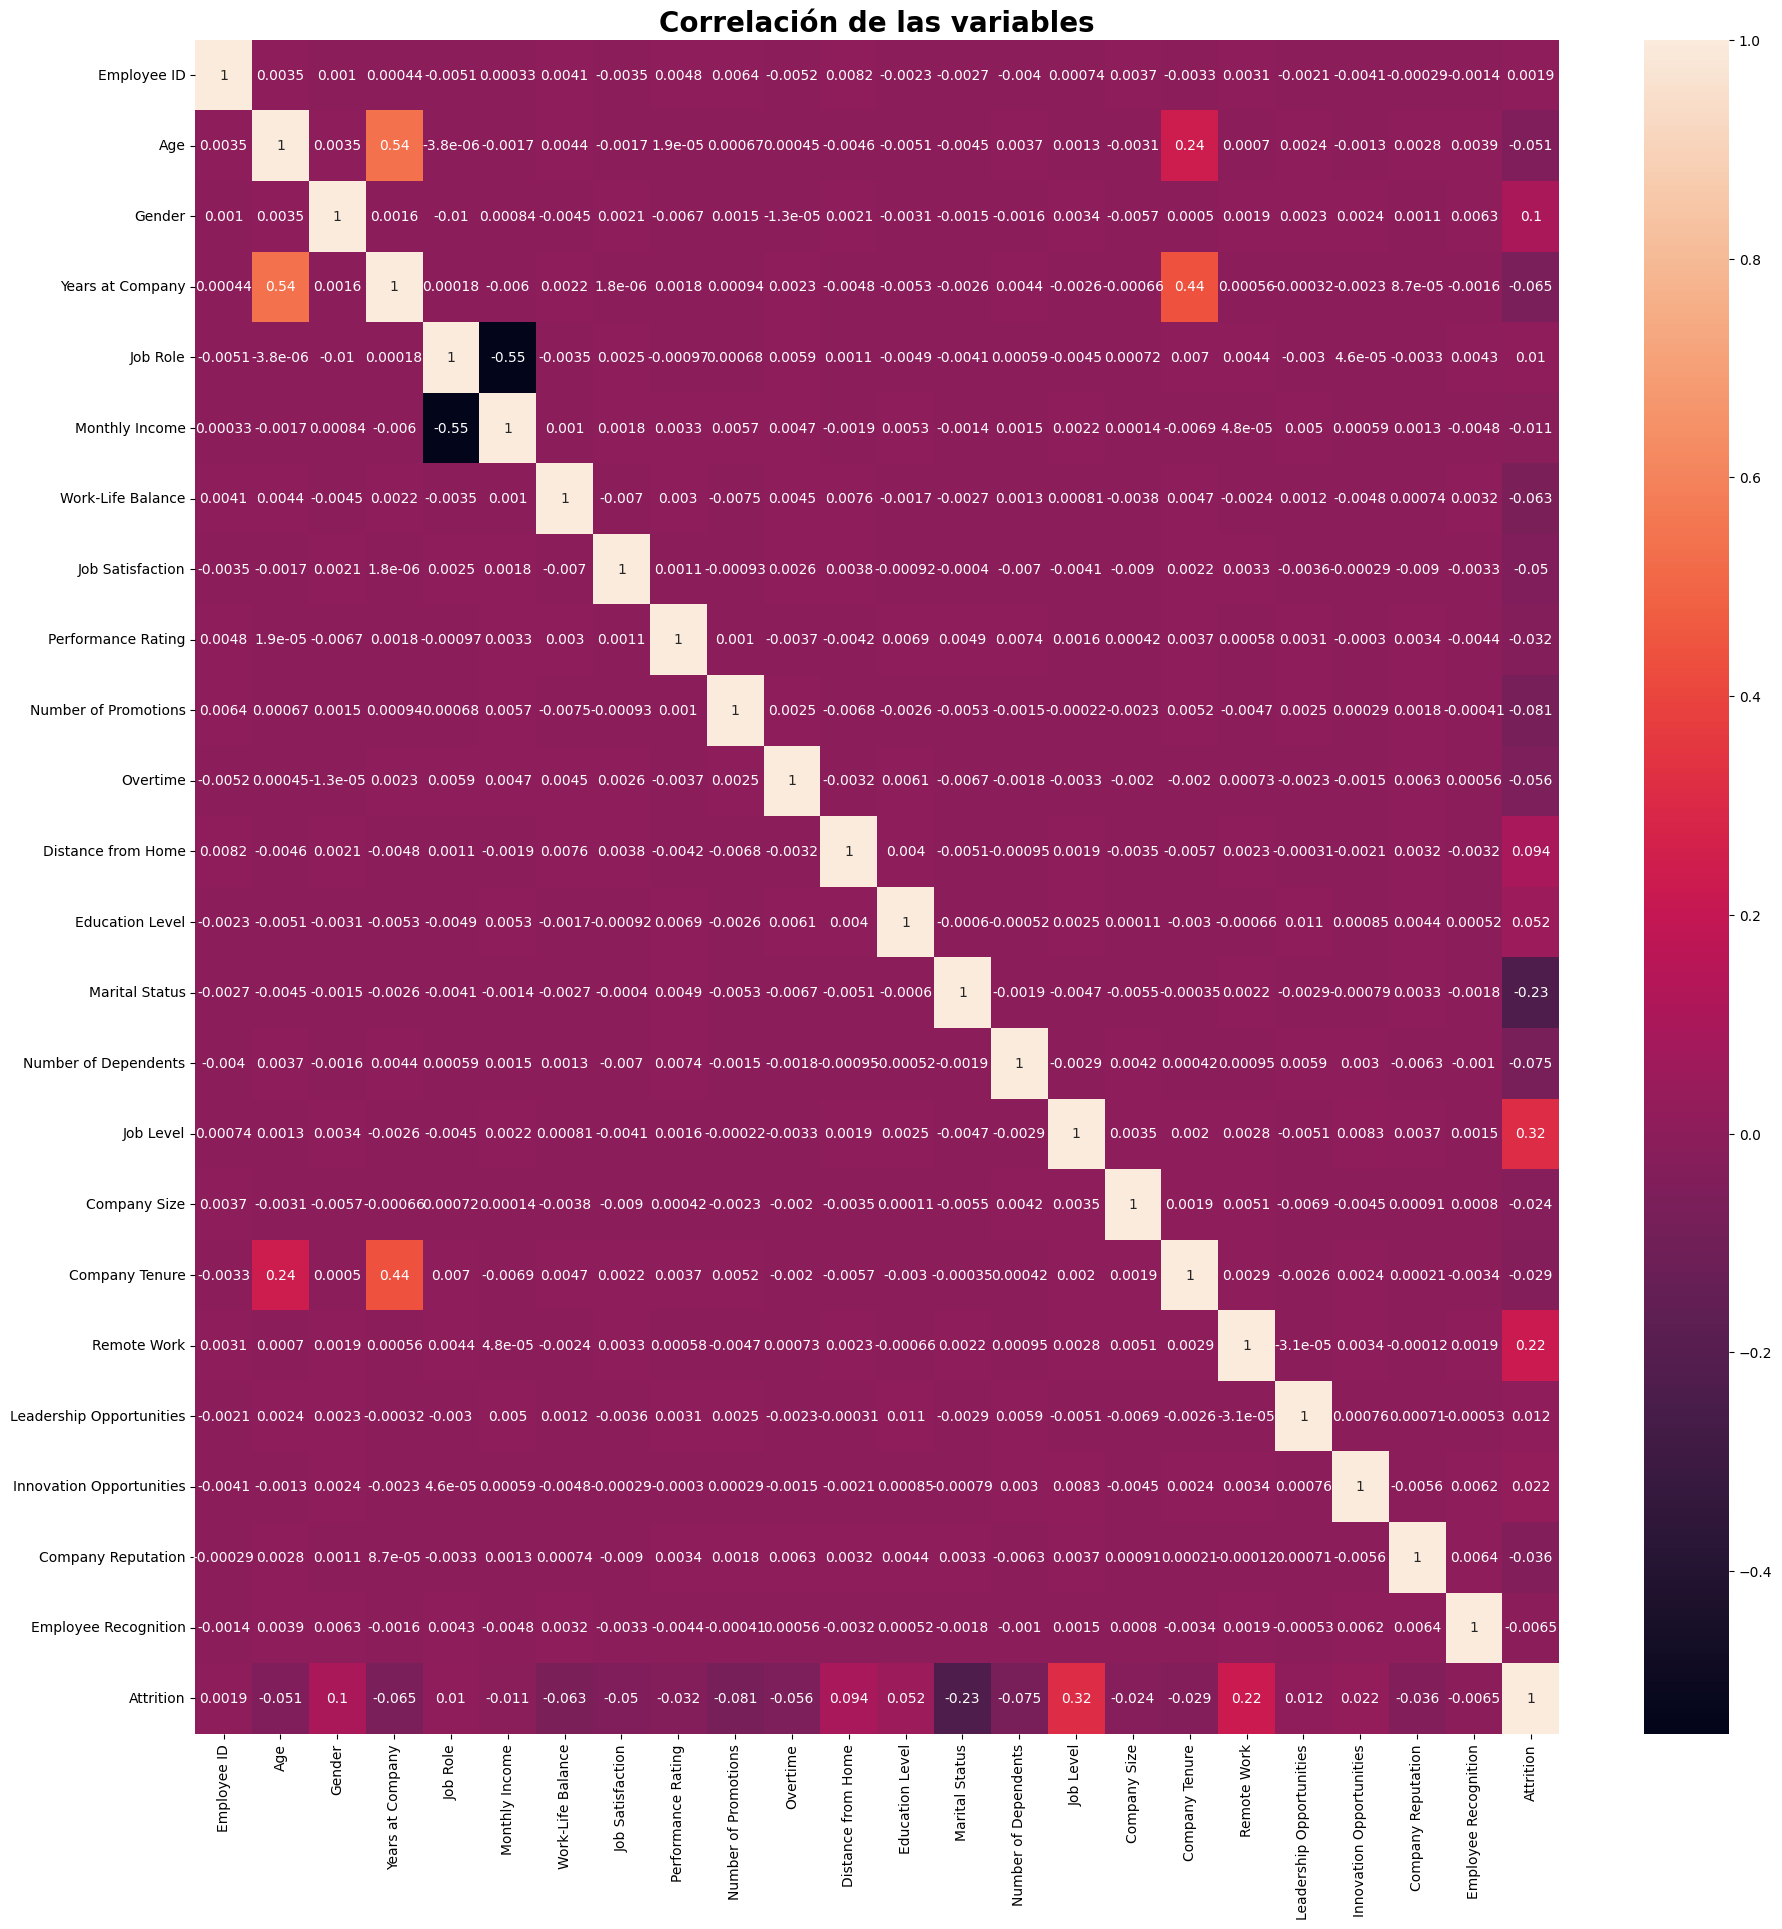

In [48]:
plt.figure(figsize=(22,22))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlación de las variables", fontsize=20, fontweight="bold")
plt.show()

---
$\textbf{Analisis}$

----

Comentarios acerca de la matriz:

+ 15 de 24 Variables presentan una correlacion negativa con la variable objetivo
+ 9 de 24 Variables presentan una correlacion Positiva con la variable objetivo

In [49]:
# Suponiendo que 'target' es el nombre de la variable objetivo
variable_objetivo = 'Attrition'

# Calcular la correlación de todas las variables con la variable objetivo
correlaciones = df.corr()[variable_objetivo]

# Crear un DataFrame con los resultados de la correlación
df_correlacion = pd.DataFrame(correlaciones).reset_index()
df_correlacion.columns = ['variable', 'correlacion']

# Ordenar los valores de correlación de forma descendente
df_correlacion = df_correlacion.sort_values(by='correlacion', ascending=False)

# Mostrar el DataFrame de correlaciones
print(df_correlacion)

                    variable  correlacion
23                 Attrition     1.000000
15                 Job Level     0.315289
18               Remote Work     0.221191
2                     Gender     0.100637
11        Distance from Home     0.093836
12           Education Level     0.051912
20  Innovation Opportunities     0.021548
19  Leadership Opportunities     0.011995
4                   Job Role     0.010433
0                Employee ID     0.001935
22      Employee Recognition    -0.006460
5             Monthly Income    -0.010687
16              Company Size    -0.024118
17            Company Tenure    -0.028964
8         Performance Rating    -0.032360
21        Company Reputation    -0.036295
7           Job Satisfaction    -0.050305
1                        Age    -0.050801
10                  Overtime    -0.056019
6          Work-Life Balance    -0.063416
3           Years at Company    -0.065388
14      Number of Dependents    -0.074606
9       Number of Promotions    -0

---
$\textbf{COMENTARIO}$

----


Los valores que muestran aca dependen en gran medida del metodo que se haya ocupado para manejar los valores cualitativos y la asignacion

In [50]:
print("Mayor correlacion positiva : ",
    df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values)

print("Mayor correlacion negativa : ",
    df_correlacion.query("correlacion <= -0.4").index.values)

# Arma la lista con los nombres de las variables
lst_features = np.append(df_correlacion.query("correlacion < 1 and correlacion >= 0.4").index.values,
    df_correlacion.query("correlacion <= -0.4").index.values)

Mayor correlacion positiva :  []
Mayor correlacion negativa :  []


In [51]:
pd.DataFrame(df['Employee ID'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Employee ID,74498.0,37249.5,21505.864514,1.0,18625.25,37249.5,55873.75,74498.0


In [52]:
pd.DataFrame(df['Job Role'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Job Role,74498.0,2.880856,1.471487,1.0,1.0,3.0,4.0,5.0


In [53]:

estadisticas_descriptivas = pd.DataFrame(df['Job Role'].describe()).T
print(estadisticas_descriptivas)

            count      mean       std  min  25%  50%  75%  max
Job Role  74498.0  2.880856  1.471487  1.0  1.0  3.0  4.0  5.0


In [54]:
pd.DataFrame(df['Monthly Income'].describe()).T

,count,mean,std,min,25%,50%,75%,max
Monthly Income,74498.0,7299.379514,2152.508566,1226.0,5652.0,7348.0,8876.0,16149.0


## Fase 3 - Preparación de datos

---
$\textbf{COMENTARIO}$

----
Se calcularan los outliers para los datos que venian por defecto siendo numericos y no categoricos 

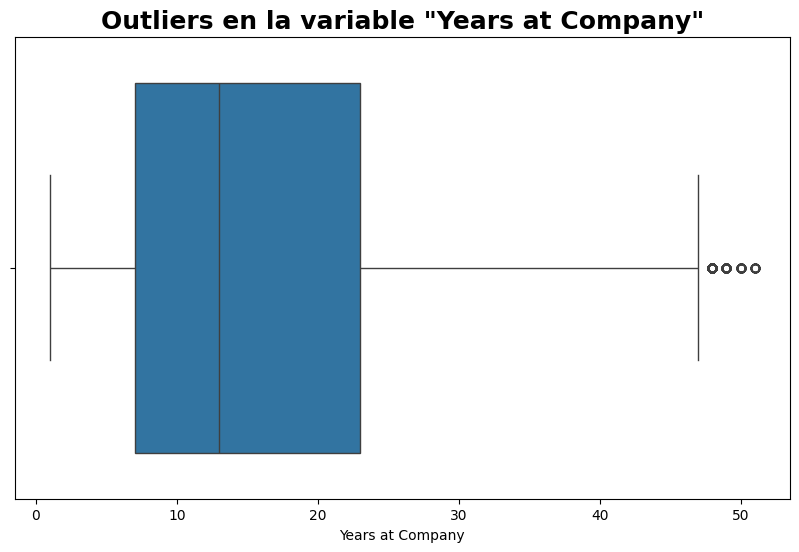

In [55]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Years at Company'])
plt.title('Outliers en la variable "Years at Company"', fontsize=18, fontweight="bold")
plt.xlabel('Years at Company')
plt.show()

In [56]:
# Calcular los límites inferior y superior para los valores atípicos
Q1 = df['Years at Company'].quantile(0.25)
Q3 = df['Years at Company'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los valores atípicos
outliers = df[(df['Years at Company'] < lower_bound) | (df['Years at Company'] > upper_bound)]

# Eliminar los valores atípicos del DataFrame
df_cleaned = df[~((df['Years at Company'] < lower_bound) | (df['Years at Company'] > upper_bound))]

# Mostrar la cantidad de datos eliminados
num_outliers = outliers.shape[0]
print(f"Cantidad de datos eliminados: {num_outliers}")

Cantidad de datos eliminados: 338


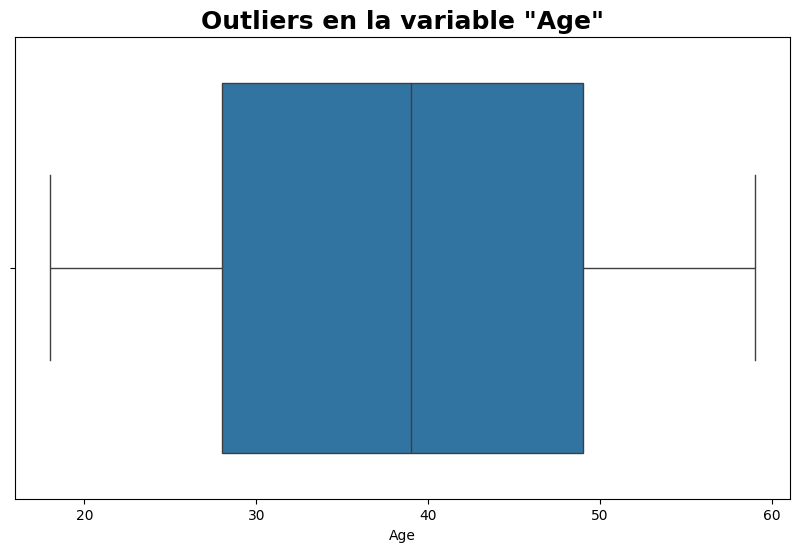

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Age'])
plt.title('Outliers en la variable "Age"', fontsize=18, fontweight="bold")
plt.xlabel('Age')
plt.show()

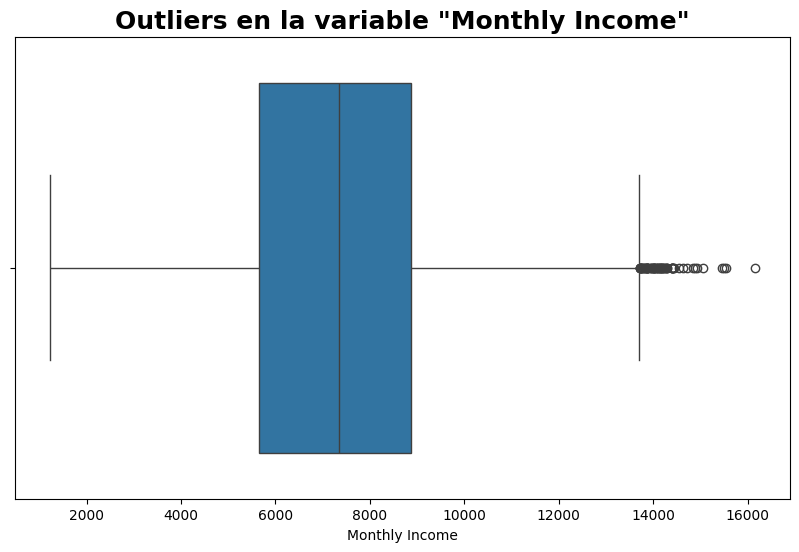

In [58]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Monthly Income'])
plt.title('Outliers en la variable "Monthly Income"', fontsize=18, fontweight="bold")
plt.xlabel('Monthly Income')
plt.show()

In [59]:
# Calcular los límites inferior y superior para los valores atípicos de "Monthly Income"
Q1_income = df['Monthly Income'].quantile(0.25)
Q3_income = df['Monthly Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Filtrar los valores atípicos
outliers_income = df[(df['Monthly Income'] < lower_bound_income) | (df['Monthly Income'] > upper_bound_income)]

# Eliminar los valores atípicos del DataFrame
df_cleaned_income = df[~((df['Monthly Income'] < lower_bound_income) | (df['Monthly Income'] > upper_bound_income))]

# Mostrar la cantidad de datos eliminados
num_outliers_income = outliers_income.shape[0]
print(f"Cantidad de datos eliminados: {num_outliers_income}")

Cantidad de datos eliminados: 65


---
$\textbf{COMENTARIO}$

----

Primero se representaron los valores atipicos(outliers) en un grafico para que fuera mas simple de ver y donde se vieron valores atipicos se eliminaron.

----

$\textbf{observacion}$


Se eliminaran los valores que menos afecten al calculo de el Attrition basado en la matriz de correlacion

In [60]:
df_new = df.drop(['Employee ID','Job Role','Leadership Opportunities', 'Innovation Opportunities','Monthly Income','Employee Recognition'],axis=1)
df_new.columns

Index(['Age', 'Gender', 'Years at Company', 'Work-Life Balance',
       'Job Satisfaction', 'Performance Rating', 'Number of Promotions',
       'Overtime', 'Distance from Home', 'Education Level', 'Marital Status',
       'Number of Dependents', 'Job Level', 'Company Size', 'Company Tenure',
       'Remote Work', 'Company Reputation', 'Attrition'],
      dtype='object')

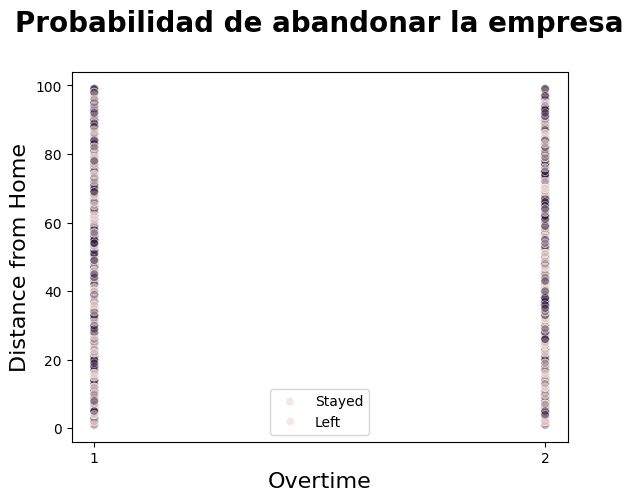

In [61]:
sns.scatterplot(
    data=df,
    x="Overtime",
    y="Distance from Home",
    hue="Attrition",
    alpha=0.5
)
plt.legend(['Stayed', 'Left'])
plt.xticks(range(1, 3, 1))
plt.xlabel("Overtime", fontsize=16)
plt.ylabel("Distance from Home", fontsize=16)
plt.title("Probabilidad de abandonar la empresa\n", fontsize=20, fontweight="bold")
plt.show()

## Fase 4 - Modelamiento

In [62]:
def view_matrix(matriz : np.array, clases : np.array):
    """ Matriz de confusión de forma gráfica """
    plt.figure(figsize=(5,5),facecolor= 'silver')
    group_counts = ["{0:0.0f}".format(value) for value in matriz.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in matriz.flatten()/matriz.sum()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(matriz, annot=labels, fmt='', cmap='Blues', xticklabels=clases, yticklabels=clases)
    plt.title("Matriz de confusión", fontsize=22, fontweight="bold")
    plt.xlabel("Predicción", fontsize=20)
    plt.ylabel("Real", fontsize=20)
    plt.show()

In [63]:
# Determina los datos con los cuales se trabajará
features = df_new.drop(columns = ['Attrition']).columns
X = df_new[features]
y = df_new.Attrition

In [64]:
# Separa la data en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29, shuffle = True, stratify = y)

### Modelos Línea base

+ ***Acá todos los modelos deben tener un accuracy y roc_auc mayor o igual a 0.7***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

---
$\textbf{Regresion Logistica}$

----

In [65]:
# Crea y entrena el modelo
clf_base = LogisticRegression(random_state=29)
clf_base.fit(X_train, y_train)
y_pred = clf_base.predict(X_test)

In [66]:
clases = ['Menor chance de Abandonar la empresa', 'Mayor chance de Abandonar la empresa']
print(classification_report(y_test, y_pred, target_names=clases))

                                      precision    recall  f1-score   support

Menor chance de Abandonar la empresa       0.72      0.73      0.73      7826
Mayor chance de Abandonar la empresa       0.70      0.70      0.70      7074

                            accuracy                           0.71     14900
                           macro avg       0.71      0.71      0.71     14900
                        weighted avg       0.71      0.71      0.71     14900



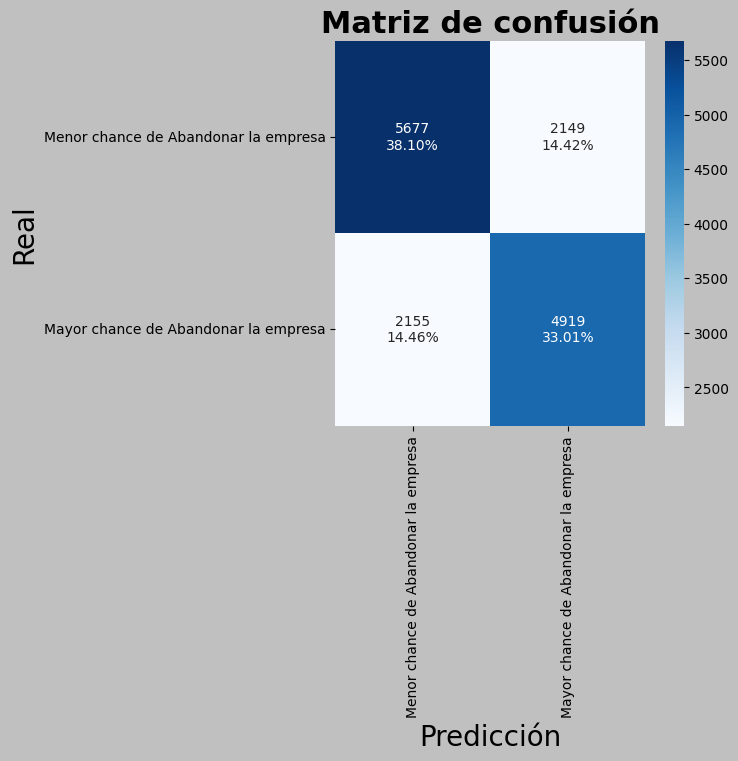

In [71]:
# Determina la matriz de confusión
matriz = confusion_matrix(y_test, y_pred)
# Muestra la matriz de confusión de manera gráfica

### Calculo e interpretacion de medidas

In [72]:
def metrics_by_matrix(matriz : np.ndarray):
    """ Retorna las métricas de clasificación desde la matriz de confusión """
    tn, fp, fn, tp = matriz.ravel()
    accuracy_manual = (tn+tp)/(tn+fp+fn+tp)
    precision_manual = tp/(tp+fp)
    recall_manual = tp/(tp+fn)
    f1_score_manual = 2*(precision_manual*recall_manual/(precision_manual + recall_manual))
    return accuracy_manual, precision_manual, recall_manual, f1_score_manual

def get_auc(real, prediccion):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion)
    return auc(fpr, tpr), tpr, fpr, thresholds

def false_positive_rate(cm):
    """Recibe una matriz de confusión y retorna la métrica de False Positive Rate"""
    tn, fp, fn, tp = cm.ravel()
    return fp / (fp + tn)


In [76]:
def interpretaciones(recall_value : float, precision_value : float, accuracy_value : float, positive_text : str):
  """
  Se ofrecen interpretaciones menos genéricas y más orientadas al negocio de las métricas, se omite f1-score porque es una combinación de precision y recall
  """
  recall_interpretacion = f"Se han identificado el {recall_value*100:.2f}% de {positive_text}"
  precision_interpretacion = f"Se han identificado un {precision_value*100:.2f}% de empleados {positive_text} y que realmente lo son"
  accuracy_interpretacion = f"El modelo acierta con un {accuracy_value*100:.2f}% de acertividad la menor o mayor chance de abandonar la empresa"
  return recall_interpretacion, precision_interpretacion, accuracy_interpretacion


In [74]:
# Obtiene las métricas a partir de la matriz de confusión
accuracy_manual, precision_manual, recall_manual, f1_score_manual = metrics_by_matrix(matriz)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual))

Precision       = 0.6960
Recall          = 0.6954
F1-score        = 0.6957
Accuracy        = 0.7111


In [77]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual, precision_manual, accuracy_manual,"con mayor riesgo de Abandonar la empresa")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 69.54% de con mayor riesgo de Abandonar la empresa 
 Se han identificado un 69.60% de empleados con mayor riesgo de Abandonar la empresa y que realmente lo son 
 El modelo acierta con un 71.11% de acertividad la menor o mayor chance de abandonar la empresa


In [78]:
# Define rangos para catalogar el valor de ROC_AUC
valores = [[0.5, 0.59], [0.6, 0.74]
,[0.75, 0.89], [0.9, 0.97]]
rangos = pd.DataFrame(np.array(valores).reshape(4,-1),
            index = ['Malo', 'Regular', 'Bueno', 'Muy bueno'], columns = ['Inferior', 'Superior'])
print(rangos)

           Inferior  Superior
Malo           0.50      0.59
Regular        0.60      0.74
Bueno          0.75      0.89
Muy bueno      0.90      0.97


In [79]:
# Obtiene el valor del área bajo la curva
roc_auc_base = roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_base))

ROC_AUC score LogisticRegression : 0.79


In [82]:
def view_rango(df_rangos : pd.DataFrame, value_roc_auc : int):
    """ Retorna la clasificación del rendimiento según el valor de roc_auc """
    return df_rangos[(df_rangos['Inferior'] <= value_roc_auc) & (value_roc_auc <= df_rangos['Superior'])].index[0]


Bueno


In [84]:
print(view_rango(rangos, roc_auc_base))

Bueno


In [86]:
def get_auc(real, prediccion, pos_label=2):
    """ Retorna AUC, TPR y FPR """
    fpr, tpr, thresholds = roc_curve(real, prediccion, pos_label=pos_label)
    return auc(fpr, tpr), tpr, fpr, thresholds

auc_base, tpr_base, fpr_base, _ = get_auc(y_test, y_pred)
print("{0:<10} = {1:.4f}".format("AUC", auc_base))
print("{0:<10} = {1}".format("TPR",tpr_base))
print("{0:<10} = {1}".format("FPR",fpr_base))

AUC        = 0.7104
TPR        = [0.        0.6953633 1.       ]
FPR        = [0.        0.2745975 1.       ]


In [87]:
# Guarda el historial de resultados
history = []
history.append([accuracy_manual, roc_auc_score(y_test, clf_base.predict_proba(X_test)[:, 1])])
print(pd.DataFrame(history, index = ['LogisticRegression'],
            columns = ['Accuracy', 'ROC_AUC']))

                    Accuracy   ROC_AUC
LogisticRegression  0.711141  0.788203


In [89]:
lst_features = ['Job Level', 'Remote Work', 'Marital Status', 'Number of Promotions']
X_alt = df_new[lst_features]
y_alt = df_new.Attrition
# Separa la data en entrenamiento y prueba
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_alt, y_alt, test_size=0.2,
            random_state = 29, stratify=y_alt, shuffle=True )

clf_x = LogisticRegression(random_state=29)
clf_x.fit(X_train_a, y_train_a)
y_pred_a = clf_x.predict(X_test_a)

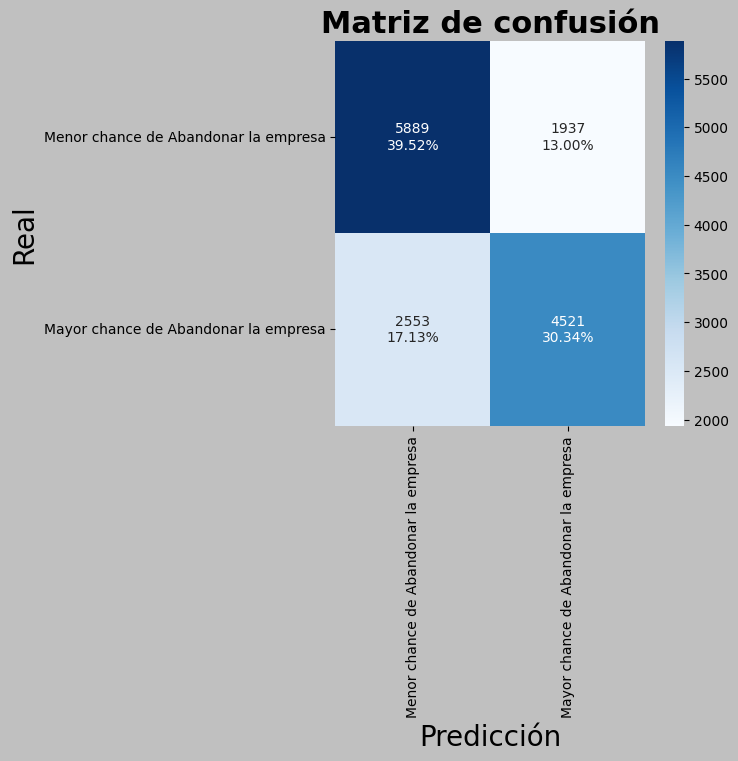

In [90]:
# Obtiene matriz de confusión
matriz_x = confusion_matrix(y_test_a, y_pred_a)
# Muestra la matriz de confusión de manera gráfica
view_matrix(matriz_x, clases)

In [91]:
accuracy_manual_a, precision_manual_a, recall_manual_a, f1_score_manual_a = metrics_by_matrix(matriz_x)
print("{0:<15} = {1:.4f}".format("Precision",precision_manual_a))
print("{0:<15} = {1:.4f}".format("Recall", recall_manual_a))
print("{0:<15} = {1:.4f}".format("F1-score ", f1_score_manual_a))
print("{0:<15} = {1:.4f}".format("Accuracy ", accuracy_manual_a))

Precision       = 0.7001
Recall          = 0.6391
F1-score        = 0.6682
Accuracy        = 0.6987


In [93]:
r_interpretacion, p_interpretacion, a_interpretacion = interpretaciones(recall_manual_a, precision_manual_a, accuracy_manual_a,"con mayor riesgo de abandonar la empresa")
print("\n", r_interpretacion, "\n", p_interpretacion, "\n", a_interpretacion)


 Se han identificado el 63.91% de con mayor riesgo de abandonar la empresa 
 Se han identificado un 70.01% de empleados con mayor riesgo de abandonar la empresa y que realmente lo son 
 El modelo acierta con un 69.87% de acertividad la menor o mayor chance de abandonar la empresa


In [94]:
# Obtiene el valor del área bajo la curva
roc_auc_x =  roc_auc_score(y_test_a, clf_x.predict_proba(X_test_a)[:, 1])
print("ROC_AUC score LogisticRegression : {:.2f}".format(roc_auc_x))

ROC_AUC score LogisticRegression : 0.76


In [95]:
# Muestra el nivel de rendimiento del modelo considerando el ROC_AUC
print(view_rango(rangos, roc_auc_x))

Bueno


In [96]:
auc_clf_x, tpr_clf_x, fpr_clf_x, _ = get_auc(y_test_a, y_pred_a)
print("{0:<10} = {1:.4f}".format("AUC", auc_clf_x))
print("{0:<10} = {1}".format("TPR",tpr_clf_x))
print("{0:<10} = {1}".format("FPR",fpr_clf_x))

AUC        = 0.6958
TPR        = [0.         0.63910093 1.        ]
FPR        = [0.         0.24750831 1.        ]


### Modelos línea base mejorada

+ ***Acá todos los modelos deben tener un roc_auc mayor o igual a 0.78***
+ Se deben incluir las métricas: acuracy, precision, recall, f1-score, matriz de confusión y roc_auc

In [67]:
# Escriba su código acá

## Fase 5 - Evaluación

Acá debe seleccionar el mejor modelo de la línea base mejorada usando una métrica que debe justificar

### Selección y justificación de la métrica

Deje acá sus comentarios

In [68]:
# Escriba su código acá

#### Obtención del mejor modelo usando la métrica seleccionada (recuerde que el roc_auc debe ser mayor a 0.78

In [69]:
# Escriba su código acá

#### Interpretación de todas las métricas del mejor modelo seleccionado

## Fase 6 - Deployment

In [70]:
# Escriba su código acá

# Pregunta

¿Recomendarían el modelo seleccionado?

Si la respuesta a la pregunta anterior es afirmativa: ¿Cuál es la razón por la cual lo recomendarían?

Si la respuesta a la pregunta es negativa: ¿Cuál es la alternativa propuesta?